In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Dataset Description

For this programming material, we are going to use 
[gene expression cancer RNA-Seq Data Set](https://archive.ics.uci.edu/dataset/401/gene+expression+cancer+rna+seq). Originally, this dataset is hosted at [synapse](https://www.synapse.org/) but for this programming material, we are going to extract dataset from [UCI](https://archive.ics.uci.edu/). The dataset contains gene expression of patients having different types of tumor: BRCA, KIRC, COAD, LUAD and 
PRAD. 

**Source:** Samuele Fiorini, samuele.fiorini@dibris.unige.it, University of Genoa, redistributed under Creative Commons license (http://creativecommons.org/licenses/by/3.0/legalcode) from https://www.synapse.org/#!Synapse:syn4301332.

**Number of attributes:** 20531

**Number of instances:** 801

In [2]:
data = pd.read_csv("CANCER_RNA_SEQ/data.csv", index_col = 0)
labels = pd.read_csv("CANCER_RNA_SEQ/labels.csv", index_col = 0)

In [3]:
data.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(data)

In [9]:
import time

start = time.time()
kmeans = KMeans(n_clusters=5, max_iter=500, random_state=99)
kmeans.fit(X)
end = time.time()

print(f"Total time required to run : {end-start} seconds")
print("Sum of Sq. distance of sample and centroid :", kmeans.inertia_)

Total time required to run : 0.326885461807251 seconds
Sum of Sq. distance of sample and centroid : 12453099.854019705


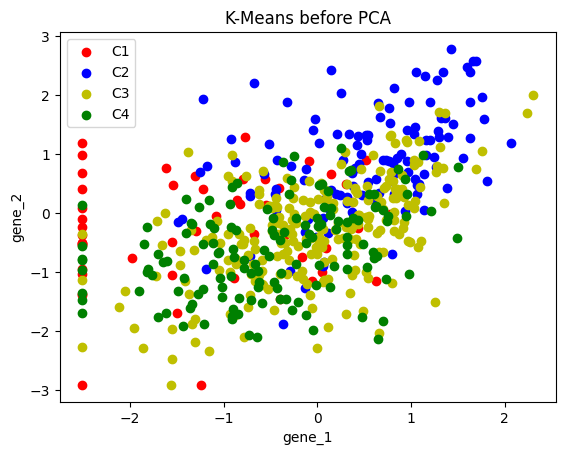

In [11]:
import matplotlib.pyplot as plt

for color, i in zip("rbyg", [0,1,2,3,4]):
    plt.scatter(
        X[kmeans.labels_ == i, 1], X[kmeans.labels_ == i, 2], c = color
    )
plt.xlabel("gene_1")
plt.ylabel("gene_2")
plt.legend(['C1','C2','C3','C4','C4'])
plt.title("K-Means before PCA")
plt.show()

# Clustering after applying PCA

Now let's cluster the data after reducing it's dimension using PCA. We will see how dimensionality reduction using PCA improves the performance of Kmeans clustering.

In [38]:
pca = PCA(n_components=250, random_state = 99)
X_reduced = pca.fit_transform(X)
X_reduced.shape

(801, 250)

In [39]:
sum(pca.explained_variance_ratio_)

np.float64(0.8409705094880374)

In [40]:
import time

start = time.time()
kmeans = KMeans(n_clusters=5, max_iter=500, random_state=99)
kmeans.fit(X_reduced)
end = time.time()

print(f"Total time required to run : {end-start} seconds")
print("Sum of Sq. distance of sample and centroid :", kmeans.inertia_)

Total time required to run : 0.009324789047241211 seconds
Sum of Sq. distance of sample and centroid : 9876067.742895568


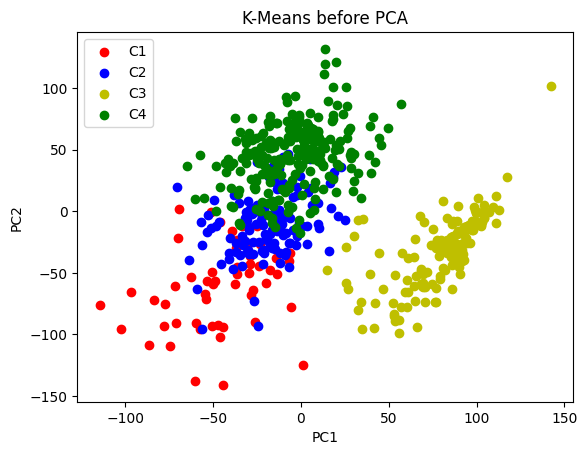

In [41]:
import matplotlib.pyplot as plt

for color, i in zip("rbyg", [0,1,2,3,4]):
    plt.scatter(
        X_reduced[kmeans.labels_ == i, 0], X_reduced[kmeans.labels_ == i, 1], c = color
    )
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(['C1','C2','C3','C4','C4'])
plt.title("K-Means before PCA")
plt.show()